# Table of contents

- [The 20newsgroup dataset](#The-20newsgroup-dataset)
- [Text vectorization: numeric representation of text](#Text-vectorization:-numeric-representation-of-text)
- [Classification model](#Classification-model)
- [Pipelines for text classification](#Pipelines-for-text-classification)

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# The 20newsgroup dataset 

Load the 20newsgroups dataset by exploiting the dedicated function in `sklearn.datasets` module. (what is a [newsgroup](https://en.wikipedia.org/wiki/Usenet_newsgroup))

In [3]:
from sklearn.datasets import fetch_20newsgroups
ng20_train = fetch_20newsgroups(subset='train')

In [4]:
type(ng20_train)

sklearn.utils._bunch.Bunch

As for other "native" sklearn datasets, the 20newsgroups is provided as a `Bunch` data structure and has the following attributes.

In [5]:
dir(ng20_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [6]:
print(ng20_train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

In [7]:
ng20_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Explore the dataset.

In [8]:
len(ng20_train.data),len(ng20_train.target)

(11314, 11314)

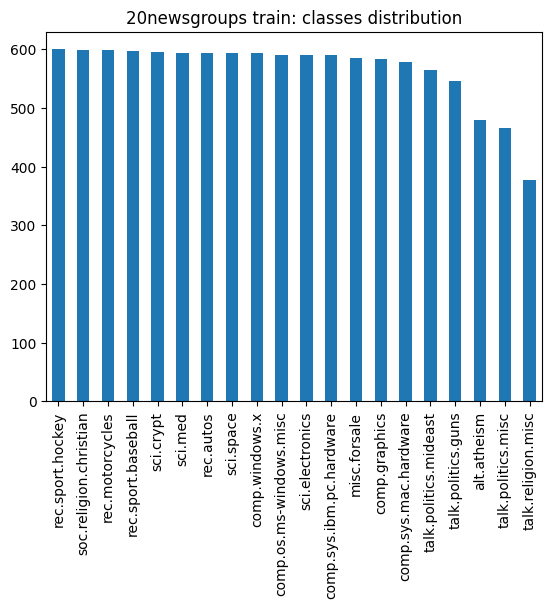

In [9]:
target_n = pd.Series(ng20_train.target).apply(lambda x: ng20_train.target_names[x])
target_vc = pd.Series(target_n).value_counts()
target_vc.plot(kind='bar',title = '20newsgroups train: classes distribution')

plt.show()

Most classes have around 600 samples. Few classes are slightly less represented but in any case with more than 300 samples.

In [10]:
ng20_train.target[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

Let's have a look at some samples

In [11]:
for idx in [0, 123,2000]:
    print(f'\n\n\t\t RECORD {idx}')
    print(f'category index: {ng20_train.target[idx]} - name: {ng20_train.target_names[ng20_train.target[idx]]}')
    print()
    print(ng20_train.data[idx])



		 RECORD 0
category index: 7 - name: rec.autos

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







		 RECORD 123
category index: 15 - name: soc.religion.christian

From: JEK@cu.nih.gov
Subject: John 3:16 paraphrased
Lines: 25

At the end of a recent (Mon 19 Apr 1993) post, Alastair Thomson
offers the following "paraphrase"

We can plot the histogram of the length of the pieces of text (in terms of number of characters).

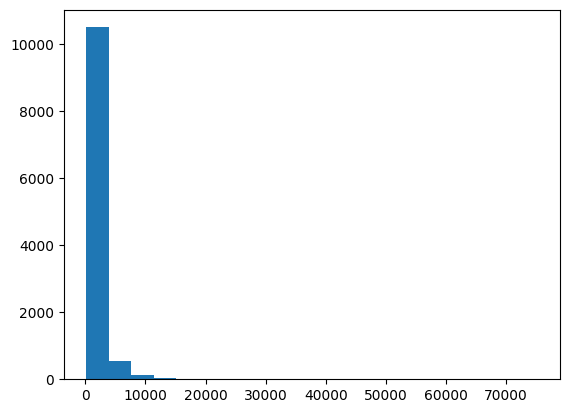

In [12]:
plt.hist([len(x) for x in ng20_train.data],bins = 20)
plt.show()

Note that it is possible to load only a sub-selection of the categories by passing the list of the categories to load to the `fetch_20newsgroups` function


In [13]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

In [14]:
ng4_train = fetch_20newsgroups(subset='train',categories = categories)
print(len(ng4_train.data))
print(ng4_train.target[:10])

2257
[1 1 3 3 3 3 3 2 2 2]


In [15]:
for idx in [0, 10, 20]:
    print(f'\n\n\t\t RECORD {idx}')
    print(f'category index: {ng4_train.target[idx]} - name: {ng4_train.target_names[ng4_train.target[idx]]}')
    print()
    print(ng4_train.data[idx])



		 RECORD 0
category index: 1 - name: comp.graphics

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



		 RECORD 10
category index: 3 - name: soc.religion.christian

From: anasaz!karl@anasazi.com (Karl Dussik)
Subject: Re: Is "Christian" a dirty word?
Organization: Anasazi Inc Phx Az USA
Lines: 73

In article <Mar.25.03.53.08.1993.24855@athos.rutgers.edu> @

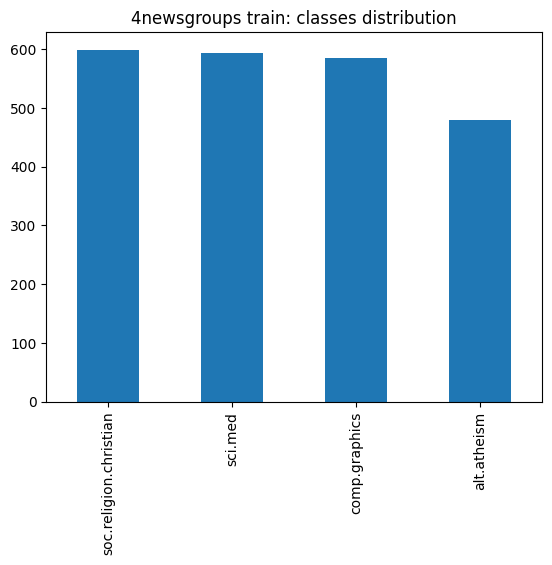

In [16]:
target_n = pd.Series(ng4_train.target).apply(lambda x: ng4_train.target_names[x])
target_vc = pd.Series(target_n).value_counts()
target_vc.plot(kind='bar',title = '4newsgroups train: classes distribution')

plt.show()

# Text vectorization: numeric representation of text

The machine learning algorithms we will use require us to give numerical data to them. Raw text data as an input will not work! This means that we have to transfer our texts to some kind of numerical representation without loosing too much information. Transferring a text from a sequence of characters to a vector of numbers is called **text vectorization**.

![text_vectorization.png](images/text_vectorization.png)

There are many different ways to vectorize texts, from fancy techniques like [word embeddings](https://en.wikipedia.org/wiki/Word_embedding) and topic models like [latent dirichlet allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) (LDA) to simple [bag-of-words models](https://en.wikipedia.org/wiki/Bag-of-words_model).

The most intuitive way to turn the text content into numerical feature vectors is the **bag of words representation**:

* assign a **fixed integer id** to each word occurring in any document of the training set (for instance by building a dictionary from words to integer indices).

* for each document $d_i$, count the **number of occurrences** of each word $w$ and store it in $X[i, j]$ as the value of feature $w_j$ where $j$ is the index of word $w$ in the dictionary.

The bag of words representation implies that `n_features` is the number of distinct words in the corpus: this number is typically very large ($10^5, 10^6$).

Let the number of features be $100,000$. If `n_samples` is $10,000$, storing `X` as a NumPy array of type `float32` would require $10,000 \times 100,000 \times 4$ bytes = 4 GB in RAM which may still be manageable on today’s computers, but undoubtedly burdensome.

Fortunately, most values in `X` will be zeros since for a given document less than a couple thousands of distinct words will be used. For this reason we say that bag of words are typically *high-dimensional sparse datasets*. We can save a lot of memory by *only storing the non-zero parts of the feature vectors in memory*.
The `scipy.sparse` matrices are data structures that do exactly this, and scikit-learn has built-in support for these structures.

`scikit-learn` offers a provides basic tools to process text using the bag of words representation. To build such a representation we will proceed as follows:

* *tokenize* strings and *give an integer id* for each possible token, for instance by using whitespaces and punctuation as token separators.
* *count* the occurrences of tokens in each document.
* *normalize* and weighting with diminishing importance tokens that occur in the majority of samples (i.e. documents).

![tfidf_vectorization.png](images/tfidf_vectorization.png)

This approach is called [**TFIDF**](http://en.wikipedia.org/wiki/Tf–idf):

* **term frequency** (TF): counts the number of times a term $t$ (word) appears in a document $d$ adjusted by the length of the document (number of all words $t'$ in document $d$).
* **inverse document frequency** (IDF): counts the number of documents $n_t$ an individual term $t$ appears over all documents $N$.
* **term frequency-inverse document frequency** (TFIDF): weights down common words like "the" and gives more weight to rare words like "software".

To perform this vectorization, scikit-learn provides the `TfidfVectorizer` class.

Usage of `TfidfVectorizer` is equivalent to usage of `CountVectorizer` (*tokenize* and *count*) followed by `TfidfTransformer` (*normalize*).

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

These objects enable many operations. Let's have a look at the documentation.

In [18]:
CountVectorizer?

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

For an efficiency comparison of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guide

```python
class sklearn.feature_extraction.text.CountVectorizer(*,
  input='content', 
  encoding='utf-8', 
  decode_error='strict', 
  strip_accents=None,   # Remove accents and perform character normalization, (by default does nothing)
  lowercase=True, 
  preprocessor=None,  # Override strip_accents and lowercase while preserving tokenizing and n-grams
  tokenizer=None, # Override the string tokenization step while preserving the preprocessing and n-grams generation steps. 
  stop_words=None, # If None, no stop words will be used. 
  token_pattern='(?u)\b\w\w+\b', # Regular expression denoting what constitutes a "token"
  ngram_range=(1, 1),  # (lower, upper) boundary of the values of n in n-grams. (1,2) -> unigrams and bigrams
  analyzer='word', # Whether the feature should be made of word n-gram or character n-grams.  If a callable is passed it is used to extract the sequence of features out of the raw, unprocessed input.
  max_df=1.0,  # Build vocabulary ignoring terms that have a document frequency higher than the threshold (corpus-specific stop words)
  min_df=1,  # Build vocabulary ignoring terms that have a document frequency lower than the threshold (cut-off)
  max_features=None,# If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
  vocabulary=None, # Custom vocabulary, otherwise determined from input documents
  binary=False, # If True, all non zero counts are set to 1. 
  dtype=<class 'numpy.int64'>)
```

In [19]:
#pip install nltk
import nltk 
nltk.download('stopwords')
nltk.download('words')

stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

[nltk_data] Downloading package stopwords to /home/jose/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /home/jose/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [62]:
count_vect = CountVectorizer(stop_words = list(stopwords))

In [63]:
print(ng4_train.data[0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [64]:
X_train_vector = count_vect.fit_transform(ng4_train.data)
X_train_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 279446 stored elements and shape (2257, 35644)>

In [65]:
X_train_vector.shape

(2257, 35644)

The sparse matrix has 2257 rows (number of documents) and 35644 columns (number of tokens in vocabulary)

**Word occurrences of a document**


In [70]:
print(count_vect.transform(['the car is red']))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 35644)>
  Coords	Values
  (0, 7834)	1
  (0, 27162)	1


In [67]:
print(count_vect.transform(['the car is red. The cat is red as well']))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 35644)>
  Coords	Values
  (0, 7834)	1
  (0, 7960)	1
  (0, 27162)	2
  (0, 34741)	1


In [26]:
print(count_vect.transform(['la macchina è rossa']))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1 stored elements and shape (1, 35644)>
  Coords	Values
  (0, 19578)	1


Let's have a look at the vocabulary the vectorizer learned from our data. We call the `vocabulary_` property on the trained vectorizer to retrieve the full vocabulary and then use a little loop to print the first items in the vocabulary:

In [27]:
vocabulary = count_vect.vocabulary_ # it is a mapping of terms to feature indices.
vocabulary

{'sd345': 28928,
 'city': 8670,
 'ac': 4015,
 'uk': 33139,
 'michael': 21592,
 'collier': 9005,
 'subject': 30977,
 'converting': 9779,
 'images': 17308,
 'hp': 16859,
 'laserjet': 19714,
 'iii': 17244,
 'nntp': 23047,
 'posting': 25571,
 'host': 16825,
 'hampton': 16039,
 'organization': 23830,
 'university': 33479,
 'lines': 20187,
 '14': 587,
 'anyone': 5190,
 'know': 19392,
 'good': 15535,
 'way': 34631,
 'standard': 30523,
 'pc': 24559,
 'application': 5274,
 'pd': 24585,
 'utility': 33795,
 'convert': 9775,
 'tif': 32276,
 'img': 17331,
 'tga': 32015,
 'files': 14243,
 'format': 14637,
 'would': 35174,
 'also': 4801,
 'like': 20132,
 'hpgl': 16870,
 'plotter': 25269,
 'please': 25245,
 'email': 12796,
 'response': 27743,
 'correct': 9906,
 'group': 15796,
 'thanks': 32033,
 'advance': 4376,
 'programmer': 26083,
 'computer': 9312,
 'unit': 33454,
 'tel': 31814,
 '071': 177,
 '477': 2326,
 '8000': 3062,
 'x3769': 35277,
 'london': 20392,
 'fax': 14048,
 '8565': 3166,
 'ec1v': 1250

In [76]:
for x in ['the', 'car', 'is', 'red', 'the', 'cat', 'is', 'red', 'as', 'well']:
    print(f'{x}: {vocabulary.get(x,"token not in voc")}')

the: token not in voc
car: 7834
is: token not in voc
red: 27162
the: token not in voc
cat: 7960
is: token not in voc
red: 27162
as: token not in voc
well: 34741


In [72]:
for x in ['la', 'macchina', 'è', 'rossa']:
    print(f'{x}: {vocabulary.get(x,"token not in voc")}')

la: 19578
macchina: token not in voc
è: token not in voc
rossa: token not in voc


In [77]:
vocabulary = count_vect.vocabulary_

#little loop to print the first items in the vocabulary
for count, item in enumerate(iter(vocabulary.items())):
    print(item)
    if count >= 10:
        break

('sd345', 28928)
('city', 8670)
('ac', 4015)
('uk', 33139)
('michael', 21592)
('collier', 9005)
('subject', 30977)
('converting', 9779)
('images', 17308)
('hp', 16859)
('laserjet', 19714)


In [74]:
print(f'The vocabulary contains {len(vocabulary)} terms in total')

The vocabulary contains 35644 terms in total


In [75]:
tokens = count_vect.get_feature_names_out()

In [33]:
tokens[:100]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007', '000usd', '0010',
       '001004', '0010580b', '001125', '001200201pixel', '0014', '001642',
       '00196', '002', '0028', '003258u19250', '0033', '0038', '0039',
       '004021809', '004158', '004627', '0049', '00500', '005148',
       '00630', '008561', '0094', '00am', '00index', '00pm', '01', '0100',
       '010116', '010702', '011255', '011308pxf3', '011605', '011720',
       '012019', '012536', '012946', '013', '013034', '0131',
       '013423tan102', '013657', '0138', '013846', '0150', '015518',
       '01580', '015931', '01720', '01752', '0179', '01821', '01830',
       '0184', '01852', '01854', '01890', '0195', '0199', '01a', '01wb',
       '02', '020', '0200', '020504', '020637', '020646', '020701tan102',
       '020751', '02115', '02118', '02139', '02142', '02154', '02160',
       '021635', '021708', '02173', '0223', '02254', '022621tan102',
       '023044', 

In [34]:
tokens[10000:10100]

array(['coup', 'couple', 'coupled', 'couples', 'courage', 'courageously',
       'courant', 'coures', 'cournoyer', 'courrier', 'course', 'courses',
       'court', 'courted', 'courteous', 'courter', 'courtesy',
       'courthouse', 'courtroom', 'courts', 'cousin', 'cousins',
       'coutellier', 'coutesy', 'coutours', 'cov', 'covalt', 'covenanent',
       'covenant', 'covenants', 'coventry', 'cover', 'coverage',
       'coverages', 'covered', 'covering', 'coverings', 'covers',
       'coversion', 'covert', 'covingc', 'covington', 'covlin', 'covlir',
       'cow', 'coward', 'cowardice', 'cowardly', 'cowardness', 'cowboys',
       'cowen', 'cowgirls', 'cows', 'cox', 'coy', 'coyle', 'coyoacan',
       'coyote', 'cozy', 'cp2', 'cpa', 'cpac', 'cpage', 'cpat', 'cpatil',
       'cpp', 'cpresson', 'cps', 'cptc1', 'cptc2', 'cptully', 'cpu',
       'cpus', 'cpuserver', 'cquel', 'cr', 'cr866', 'crab', 'crack',
       'cracked', 'crackers', 'cracking', 'cradle', 'craft', 'crafted',
       'craftsm

In [35]:
tokens[-100:]

array(['za', 'zabolotzky', 'zabriskie', 'zach', 'zakariyah', 'zakat',
       'zalan', 'zamenhof', 'zaphod', 'zara', 'zation', 'zazen',
       'zbuffering', 'zc', 'zcat', 'zcomm', 'zeal', 'zealand', 'zealous',
       'zebedee', 'zebras', 'zech', 'zechariah', 'zeit', 'zeitgeist',
       'zeitschrift', 'zeke', 'zemcik', 'zen', 'zenith', 'zenkar', 'zeno',
       'zentrum', 'zephyr', 'zeppelin', 'zerfall', 'zero', 'zero_',
       'zeroed', 'zeta', 'zeus', 'zhang', 'zhao', 'zhenghao', 'zhou',
       'ziedman', 'zikopoulos', 'zilch', 'zillions', 'zimmerman', 'zinc',
       'zion', 'zionist', 'zip', 'zipped', 'zippy', 'zirkel', 'zisfein',
       'zlumber', 'zmodem', 'zoerasterism', 'zola', 'zolf', 'zolft',
       'zoloft', 'zombie', 'zonal', 'zone', 'zonker', 'zoo', 'zooid',
       'zool', 'zoom', 'zooming', 'zooms', 'zopfi', 'zorasterism', 'zorg',
       'zorn', 'zrz', 'zsoft', 'zt', 'zubkoff', 'zues', 'zug', 'zumder',
       'zur', 'zurich', 'zurlo', 'zus', 'zvi', 'zvonko', 'zwart', 'zyeh',


A glimpse on the features that are extracted (i.e. tokens) suggests that there are a lot of meaningless  words.
We can perform a more aggressive preprocessing (e.g., removing numbers and other special symbols) to avoid this.


Furthermore, by setting the parameters `max_df` and/or `min_df` and/or `max_features`, we can further reduce the number of words (i.e. number of attributes) in order to:
- apply a sort of feature selection (remove noisy features)
- reduce memory consumption 
- reduce required computational power


In [36]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vector)

X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 279446 stored elements and shape (2257, 35644)>

In [37]:
X_train_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 279446 stored elements and shape (2257, 35644)>

In [38]:
print(tfidf_transformer.transform(count_vect.transform(['the car is red'])))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 35644)>
  Coords	Values
  (0, 7834)	0.7176718184517982
  (0, 27162)	0.6963814766348178


Combine `CountVectorizer` and `TfIdfTransformer` in a single object:

In [39]:
vectorizer = TfidfVectorizer(stop_words = list(stopwords))
X_train_tfidf = vectorizer.fit_transform(ng4_train.data)

In [40]:
vectorizer.transform(['the car is red']).data

array([0.71767182, 0.69638148])

In [41]:
X_train_tfidf.nnz / float(X_train_tfidf.shape[0])

123.81302614089499

In [80]:
123/35644

0.00345079115699697

On average, there are 124 non-zero components by sample in a 35644-dimensional space (0.035%)

### Import the test samples

Import the files pertaining to the same 5 categories

In [81]:
ng4_test = fetch_20newsgroups(subset='test',categories = categories)

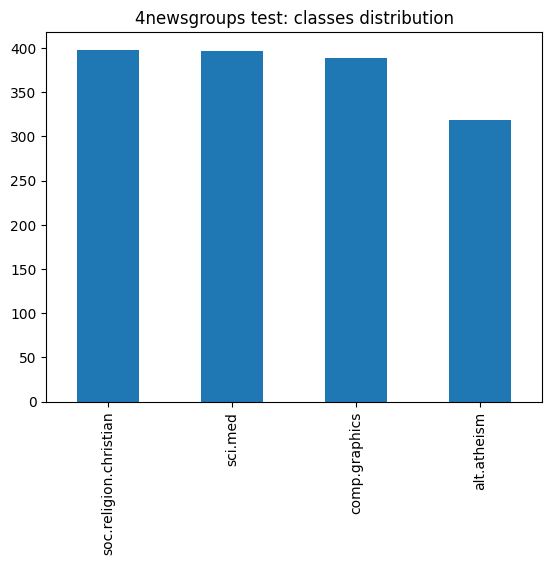

In [82]:
target_n = pd.Series(ng4_test.target).apply(lambda x: ng4_test.target_names[x])
target_vc = pd.Series(target_n).value_counts()
target_vc.plot(kind='bar',title = '4newsgroups test: classes distribution')

plt.show()

In [83]:
len(ng4_test.data), len(ng4_train.data)

(1502, 2257)

# Classification model

In [46]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, ng4_train.target)


**Novel, custom, samples (you can simulate *production* behaviour)**

In [47]:
docs_new = ['is there any afterlife', 'OpenGL on the GPU is fast']


In [48]:
docs_new_tfidf = vectorizer.transform(docs_new)
docs_new_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (2, 35644)>

In [49]:
predicted_class = clf.predict(docs_new_tfidf)
[ng4_train.target_names[x] for x in predicted_class]

['soc.religion.christian', 'comp.graphics']

In [50]:
predicted_class_prob = clf.predict_proba(docs_new_tfidf)
predicted_class_prob

array([[0.19546662, 0.21410896, 0.21286773, 0.37755669],
       [0.15884802, 0.39744201, 0.23452699, 0.20918299]])

**The actual test-set**

In [86]:
X_test_tfidf = vectorizer.transform(ng4_test.data)
y_pred = clf.predict(X_test_tfidf)
y_pred

array([2, 2, 2, ..., 2, 2, 1], shape=(1502,))

# Evaluation metrics

In [87]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(ng4_test.target,y_pred,target_names = ng4_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.72      0.83       319
         comp.graphics       0.95      0.94      0.95       389
               sci.med       0.95      0.87      0.91       396
soc.religion.christian       0.75      0.98      0.85       398

              accuracy                           0.89      1502
             macro avg       0.91      0.88      0.88      1502
          weighted avg       0.90      0.89      0.89      1502



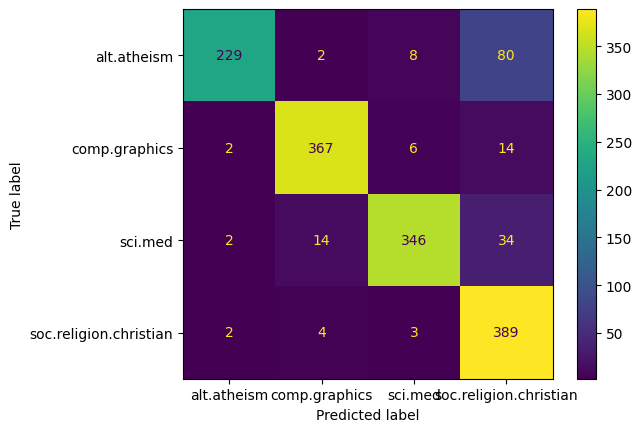

In [88]:
ConfusionMatrixDisplay.from_predictions(ng4_test.target,y_pred,display_labels = ng4_test.target_names)
plt.show()

The overall accuracy is quite high (around 90%), and so are precision and recall per class.

The only exceptions arise for the **precision of class "soc.religion.chrisitan"** (0.75) and **recall of class "alt.atheism"**. Specifically 80 examples from class alt.atheism are improperly classified as soc.religion.chrisitan.
Evidently, the two classes are likely to pertain to similar semantic areas and this introduces some confusion in discriminating among them.

Let's have a look at some misclassified samples.

In [89]:
misclassified_atheism = np.asarray(ng4_test.data)[(ng4_test.target!=y_pred) & (ng4_test.target == 0)]
for m_atheism in misclassified_atheism[:3]:
    print(m_atheism)


From: swf@elsegundoca.ncr.com (Stan Friesen)
Subject: Re: After 2000 years, can we say that Christian Morality is
Organization: NCR Teradata Database Business Unit
Lines: 74

[This is SWF in another indirect post via Dan].

In article <1993Apr20.150829.27925@asl.dl.nec.com>,
duffy@aslss02.asl.dl.nec.com (Joseph Duffy) writes:
|> In article <1993Apr17.184948.4847@microsoft.com>
russpj@microsoft.com (Russ Paul-Jones) writes:
|> >
|> >The same way that any theory is proven false.  You examine the
predicitions
|> >that the theory makes, and try to observe them.  If you don't, or
if you
|> >observe things that the theory predicts wouldn't happen, then you
have some
|> >evidence against the theory.  If the theory can't be modified to
|> >incorporate the new observations, then you say that it is false.
|>
|> But how does one handle the nonrepeatability of the experiment? In
many types of
|> experiments the "prediction" is that the observed phenomena will
happen again
|> and be capable of bein

### Model inspection

Can we get some information about the most informative features?

The MultinomialNB object exposes the attribute `feature_log_prob_` which represents the empirical log probability of features given a class, $P(x_i|y)$.
 

In [94]:
# https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset
import numpy as np
def show_top10(clf, vectorizer, categories):
    feature_names = vectorizer.get_feature_names_out()
    for i, category in enumerate(categories):
        top10 = np.argsort(clf.feature_log_prob_[i])[-10:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, ng4_train.target_names)


alt.atheism: sgi livesey people writes one caltech com god keith edu
comp.graphics: organization posting subject university lines com files image edu graphics
sci.med: science article cs msg geb banks gordon com pitt edu
soc.religion.christian: bible christian one people would christians church edu jesus god


We can notice, for example, that among the most informative features there are some apparently unrelated to the topic (e.g. *edu*, *com*) 

# Pipelines for text classification

Text processing and classification is a typical scenario where pipelines can be helpful.

In the following, the whole exercise is repeated for the whole 20newsgroup dataset.


                          precision    recall  f1-score   support

             alt.atheism       0.81      0.66      0.73       319
           comp.graphics       0.78      0.71      0.74       389
 comp.os.ms-windows.misc       0.79      0.70      0.74       394
comp.sys.ibm.pc.hardware       0.67      0.80      0.73       392
   comp.sys.mac.hardware       0.87      0.81      0.84       385
          comp.windows.x       0.87      0.79      0.82       395
            misc.forsale       0.88      0.78      0.82       390
               rec.autos       0.87      0.92      0.90       396
         rec.motorcycles       0.93      0.95      0.94       398
      rec.sport.baseball       0.92      0.91      0.92       397
        rec.sport.hockey       0.88      0.98      0.93       399
               sci.crypt       0.72      0.97      0.83       396
         sci.electronics       0.83      0.64      0.72       393
                 sci.med       0.92      0.78      0.84       396
         

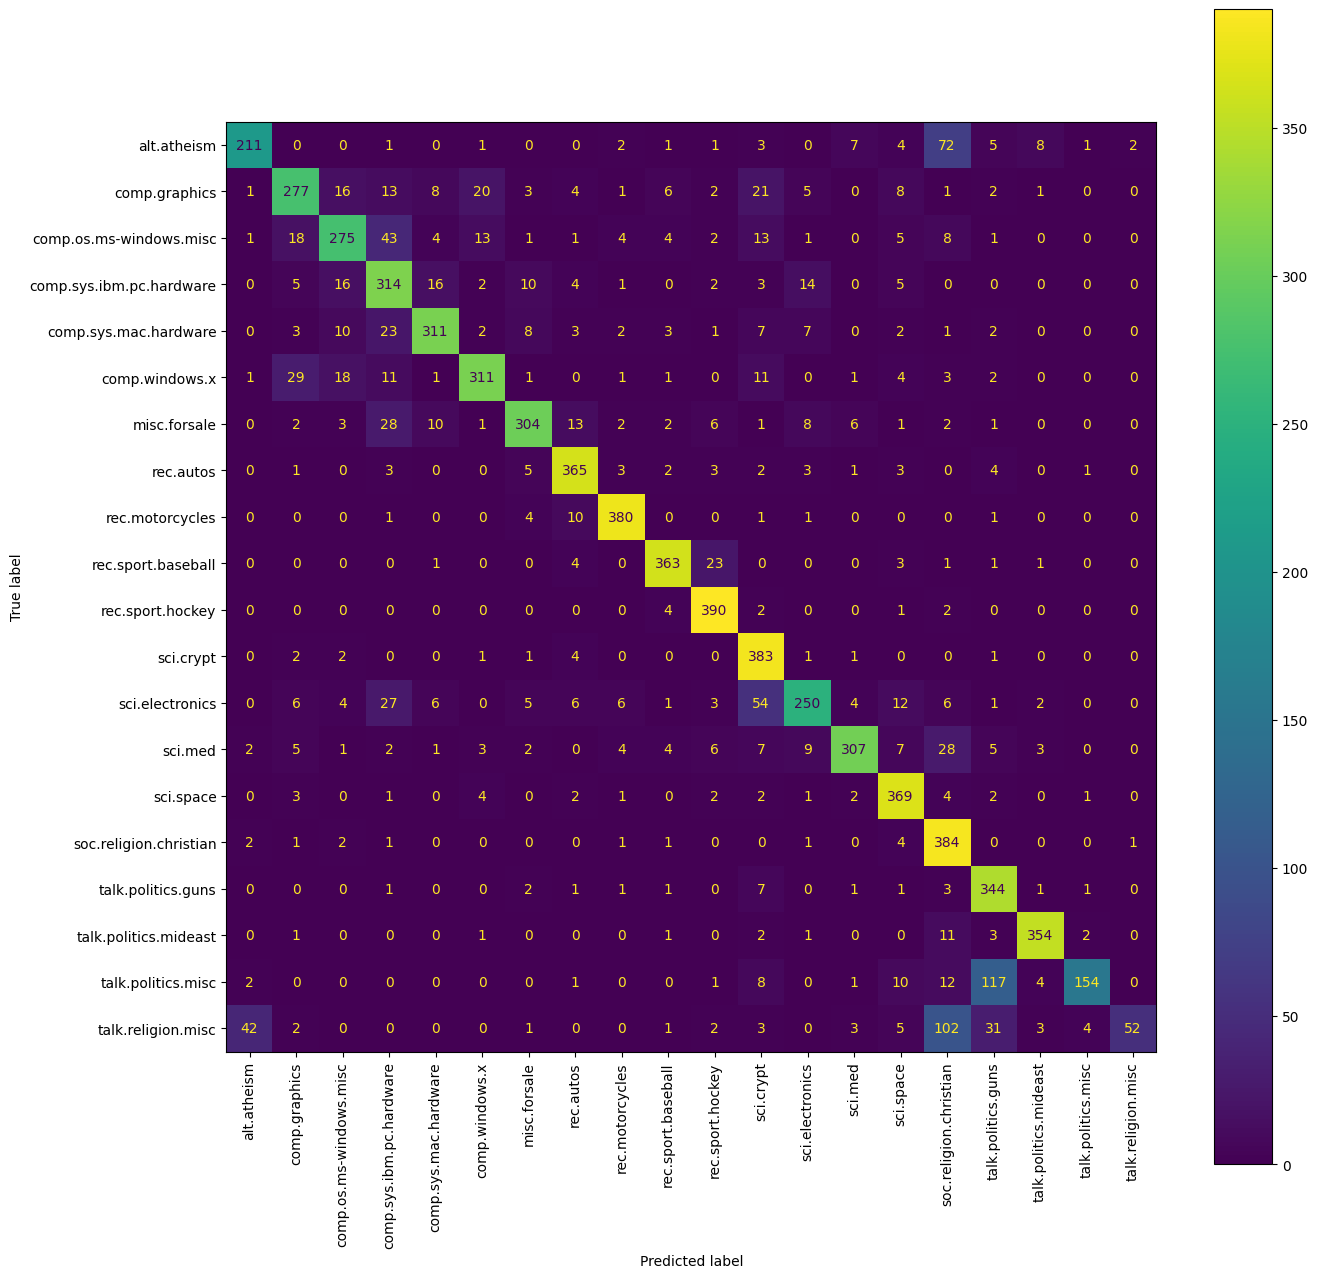

129963

In [56]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline

ng20_train = fetch_20newsgroups(subset='train')
ng20_test = fetch_20newsgroups(subset='test')

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words = list(stopwords))),
    ('clf', MultinomialNB()),
])

text_clf.fit(ng20_train.data,ng20_train.target)
y_pred = text_clf.predict(ng20_test.data)
print(classification_report(ng20_test.target,y_pred,target_names = ng20_test.target_names))
fig,ax = plt.subplots(figsize = (15,15))
ConfusionMatrixDisplay.from_predictions(ng20_test.target,y_pred,display_labels = ng20_test.target_names,ax=ax,xticks_rotation='vertical')
plt.show()
len(text_clf[0].vocabulary_)

Let's try to add the stemmer to the text processing pipeline.

In [57]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer('english')

In [58]:
analyzer = TfidfVectorizer(stop_words = stopwords).build_analyzer()
print(analyzer(ng20_train.data[0])[:10])

['lerxst', 'wam', 'umd', 'edu', 'thing', 'subject', 'car', 'nntp', 'posting', 'host']


In [59]:
def snowball_analyzer(doc):
    return [snow_stemmer.stem(w) for w in analyzer(doc)]

In [60]:

print(snowball_analyzer(ng20_train.data[0])[:10])

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer = snowball_analyzer)),
    ('clf', MultinomialNB()),
])

['lerxst', 'wam', 'umd', 'edu', 'thing', 'subject', 'car', 'nntp', 'post', 'host']


                          precision    recall  f1-score   support

             alt.atheism       0.81      0.63      0.71       319
           comp.graphics       0.78      0.71      0.74       389
 comp.os.ms-windows.misc       0.83      0.68      0.75       394
comp.sys.ibm.pc.hardware       0.68      0.79      0.73       392
   comp.sys.mac.hardware       0.85      0.82      0.83       385
          comp.windows.x       0.86      0.79      0.82       395
            misc.forsale       0.90      0.73      0.80       390
               rec.autos       0.87      0.93      0.90       396
         rec.motorcycles       0.92      0.96      0.94       398
      rec.sport.baseball       0.92      0.92      0.92       397
        rec.sport.hockey       0.90      0.98      0.94       399
               sci.crypt       0.69      0.97      0.80       396
         sci.electronics       0.83      0.64      0.72       393
                 sci.med       0.92      0.78      0.84       396
         

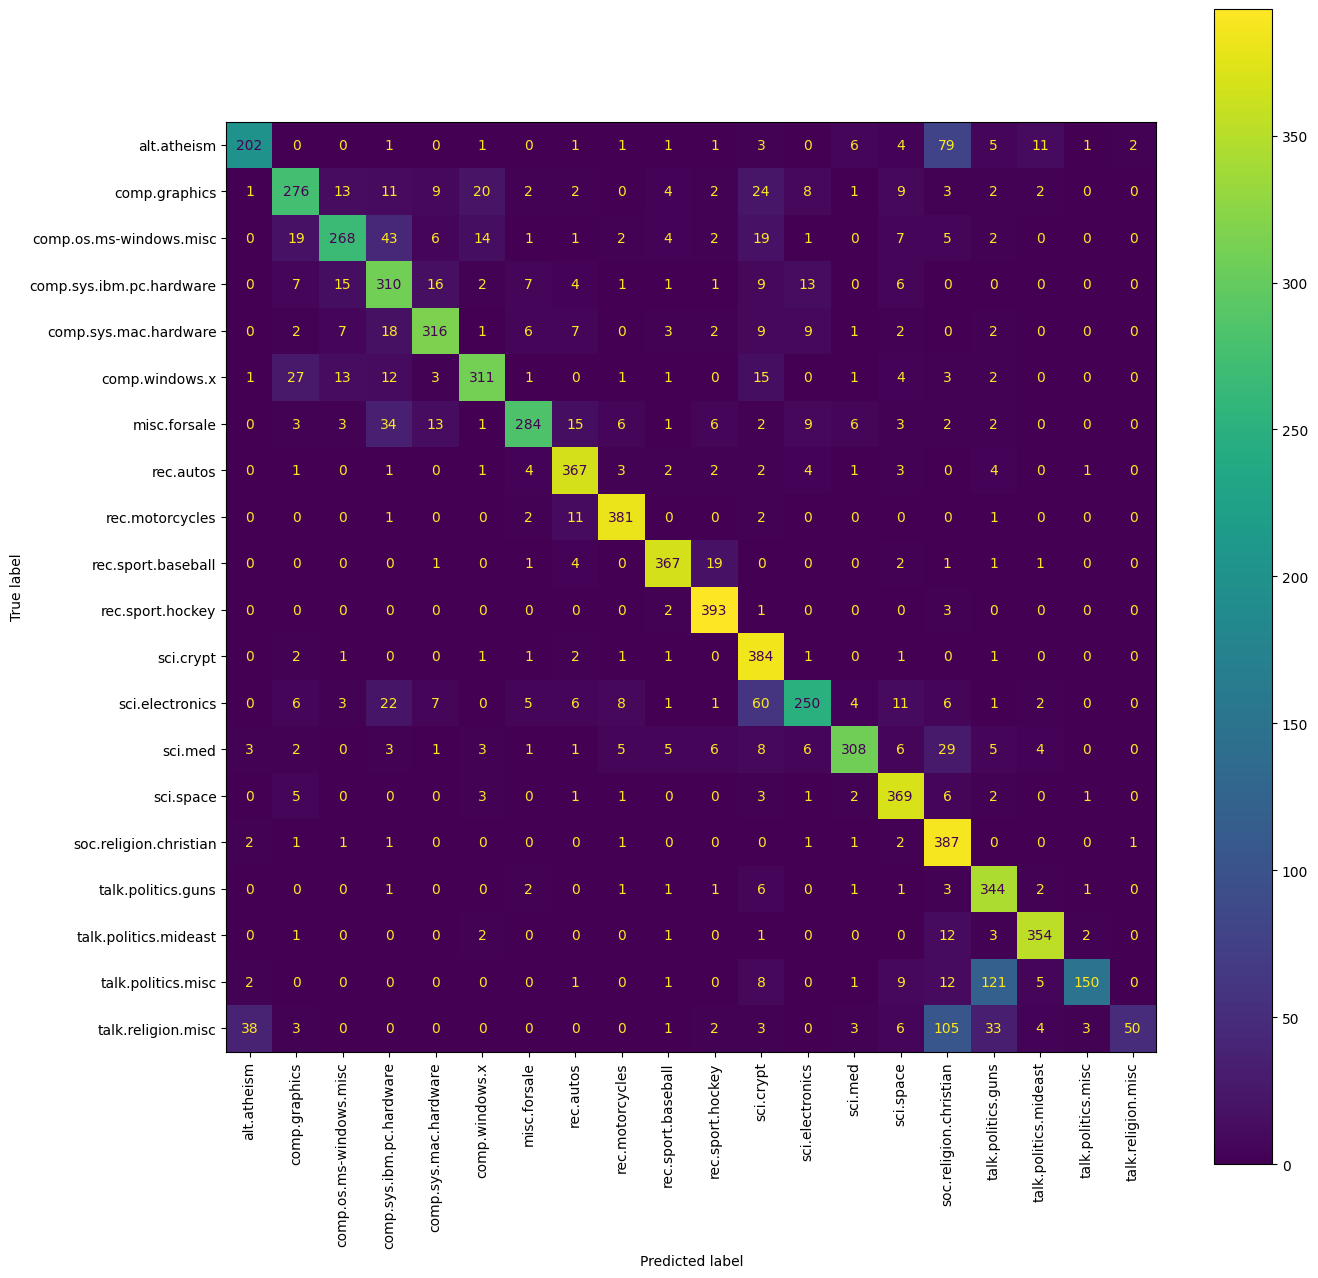

111067

In [61]:
text_clf.fit(ng20_train.data,ng20_train.target)
y_pred = text_clf.predict(ng20_test.data)
print(classification_report(ng20_test.target,y_pred,target_names = ng20_test.target_names))
fig,ax = plt.subplots(figsize = (15,15))
ConfusionMatrixDisplay.from_predictions(ng20_test.target,y_pred,display_labels = ng20_test.target_names,ax=ax,xticks_rotation='vertical')
plt.show()
len(text_clf[0].vocabulary_)

How can we comment this result?

Further developments:
- Consider the 20newsgroup dataset, limited to the 4 categories we have analyzed in this notebook.
- Can you tune the processing/classification pipeline and improve the performance on the test set?
    - For example (not exhaustive, be creative!)
        - act on the text processing stage to reduce the feature space and remove "noisy" tokens;
        - act on the text processing stage by apply stemming;
        - remove the header (`fetch_20newsgroup` has an attribute `remove` that you can tune);
        - extract only the "subject" of each piece of news and try to infer the topic based only on that; 
        - use other classification models;
    - Note: select your best model (text processing / vectorization / classification) on the training set by using cross-validation, and then evaluate its final performance on the test set
